In [1]:
# settings
import numpy as np
import matplotlib.pylab as plt
import scipy, scipy.stats
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 4.0)

$\usepackage{amssymb} \newcommand{\R}{\mathbb{R}} \newcommand{\vx}{\vec{x}}$

## 3.4. Principal Component Analysis (PCA)

* The PCA is a simple standard method for dimensionality reduction
* Principal Idea: Determine a low-dimensional linear subspace that contains the largest share of the variance.

<img src = "images/projection.png" width="30%">

**Given**: data set $ X = \{\vec{x}^\alpha\}_{\alpha=1\dots N}, \vec{x}^\alpha \in \R^d $
Let w.l.o.g. the data be **centered**, i.e. all features are shifted/translated so that means are 0:
$$
\frac{1}{N} \sum\limits_{\alpha=1}^N \vx^\alpha = \vec{0}
$$

**Approach**: Maximize the variance of the data after projection onto a vector $\hat v$.

* The estimated variance in the subspace along vector $\hat v$ with  $\|\hat v\| = 1$ is given by

$$ F(\hat v) = \frac{1}{N} \sum\limits_{\alpha=1}^N (\vx^{\alpha \tau} \hat v)^2 $$
$$ = \frac{1}{N} \sum\limits_{\alpha=1}^N {\hat v}^\tau \vx^\alpha\vx^{\alpha \tau} \hat v$$
$$ = {\hat v}^\tau \underbrace{ \left[ \frac{1}{N} \sum\limits_{\alpha=1}^N \vx^\alpha\vx^{\alpha \tau}\right] }_{\text{estimated covariance matrix} C} \hat v$$
$$ = \hat v^\tau C \hat v$$

In [7]:
# projection plot
R = np.random.randn(200, 2)*[5,1]
a = -np.pi/180*40
X = (np.matrix([[np.cos(a), np.sin(a)], [-np.sin(a), np.cos(a)]])*R.transpose()).transpose()

def pltprj(alpha=0.1):
    plt.subplot(121)
    plt.plot(X[:,0], X[:,1], ".")
    vec = [np.cos(alpha), np.sin(alpha)]
    plt.plot([-10*vec[0], 10*vec[0]], [-10*vec[1], 10*vec[1]], 'r', lw=2)
    plt.axis('equal')
    plt.subplot(122)
    prj = np.zeros(np.shape(X))
    prj[:,0] = np.dot(np.matrix(X), vec)
    prj[:,1] = np.dot(np.matrix(X), [-np.sin(alpha), np.cos(alpha)])
    # plt.plot(prj[:,0], prj[:,1], ".")
    plt.plot(prj[:,0], 0*prj[:,0], ".")
    plt.axis([-15, 15, -10, 10]);
    # plt.axis('equal')

interact(pltprj, alpha=(0, np.pi, 0.05));

interactive(children=(FloatSlider(value=0.1, description='alpha', max=3.141592653589793, step=0.05), Output())…

* $C$ is a positive semi-definite symmetric matrix. 
* Thus it exists a decomposition 
$$ C = UDU^\tau$$ 
with 
* $U = [\vec{u}_1,\dots,\vec{u}_d]$ being the matrix of eigenvectors of $C$ 
and 
* $D = \text{diag}(\lambda_1,\dots,\lambda_d):$ are the real-valued eigenvalues of $C$.

**Wanted**: 
$$\sigma^2_{\max} = \max_{\vec{w}} F(\vec{w}) = \max \frac{\vec{w}^\tau C\vec{w}}{\vec{w}^\tau \vec{w}} $$

**Method**: 
Determine the zero crossings of all partial derivatives of $F(\vec{w})$
$$
\nabla_{\vec{w}}F = \frac{2 C \vec{w}}{\vec{w}^\tau \vec{w}} - \frac{\vec{w}^\tau C \vec{w}}{(\vec{w}^\tau \vec{w})^2} 2\vec{w} = 0
$$
* Note that here the product rule $(uv)' = u'v + uv'$ has been applied

* We can reshape the equation as
$$
C\vec{w} = \underbrace{\left[ \frac{\vec{w}^\tau C \vec{w}}{\vec{w}^\tau \vec{w}}  \right]} \vec{w} ~~~~~ \left| ~~~~~\text{then multiply eq. with}~~ \cdot 1/\|\vec{w}\|\right.$$
$$ C\hat w ~~~~~ = ~~~~~ \lambda ~~~~~~ \hat w ~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

* Yet this is just the eigenvalue condition!
* The necessary condition of stationarity leads to solutions that are the eigenvectors
* For that reason $F$ is maximized by the eigenvector belonging to the largest eigenvalue

Usually we use a sorted order or eigenvalues: $\lambda_1\ge\lambda_2\ge\dots\lambda_d~(\ge 0)$.

Then we can simply write 
$$F_{\max} = \sigma^2_{\max} = \lambda_1$$

With that, we can determine the first principal component of the data:

$$ y_1^\alpha = \hat{u}_1^\tau \vx^\alpha ~~~~~~~~~ \text{(projection indices)} $$

Transformation back into data space:
$$ \tilde{x}^\alpha = \hat{u}_1 y_1^\alpha = \underbrace{\hat u_1 \hat u_1^\tau}_{\text{Projektionsmatrix}}\vx^\alpha~\text{(reconstruction)}$$

Concerning the data compression 
* Coding using equation 'projection indices'
* Decoding using equation 'reconstruction'

The estimated variance along the first principal component is $\sigma_1^2 = \lambda_1$

**Total variance of the data distribution:**

\begin{eqnarray}
V & = & \sum\limits_{j=1}^d \text{Var}(x_j) = 
\frac{1}{N} \sum\limits_{\alpha=1}^N \vx^{\alpha \tau}\vx^\alpha ~~~ \text{(since mean 0)}\\
& = & \frac{1}{N} \sum_\alpha \text{trace}(\vx^\alpha \vx^{\alpha\tau})\\
& = & \text{trace}\left[ \frac{1}{N} \sum_\alpha \vx^\alpha \vx^{\alpha\tau}\right]\\
& = & \text{trace}(C)\\
\end{eqnarray}

But since $C=UDU^\tau$ and $\text{trace}(M) = \text{trace}(U^\tau MU) ~~ \forall ~~ U$ orthonormal, it is 
$$
V = \text{trace}(D) = \text{trace}(\text{diag}(\lambda_1,\dots,\lambda_d)) = \sum_{i=1}^d \lambda_i
$$

**Iterative application to perpendicular subspace**

Now we search the 1-dimensional subspace which contains the largest fraction of the remaining variance $\sum_{i=2}^d \lambda_i$. 

The decomposition yields for the orthogonal part 
$$
\vx = \vx^{(1)} + (\vx - \vx^{(1)}) = \hat u_1 \hat u_1^\tau \vx + \underbrace{( I - \hat u_1 \hat u_1^\tau )}_{\text{projection matrix}} \vx
$$

Now we maximize 
\begin{eqnarray}
F^{(2)}(v) & = & \frac{1}{N} \sum_\alpha^N \hat v^\tau\left[(I-\hat u_1\hat u_1^\tau)\vx^\alpha\right]\left[(I-\hat u_1\hat u_1^\tau)\vx^\alpha\right]^\tau \hat v \\
& = & \frac{1}{N} \sum_\alpha^N \hat v^\tau (I-\hat u_1\hat u_1^\tau)\vx^\alpha\vx^{\alpha\tau} (I-\hat u_1\hat u_1^\tau) \hat v\\
& = & \hat v^\tau (I-\hat u_1\hat u_1^\tau) C (I-\hat u_1\hat u_1^\tau) \hat v \\
& = & \hat v^\tau (  C -  \hat u_1\hat u_1^\tau C - C \hat u_1\hat u_1^\tau + \hat u_1\hat u_1^\tau C \hat u_1\hat u_1^\tau) \hat v\\
& = & \hat v^\tau (  C -  \hat u_1\lambda_1\hat u_1^\tau  - \underbrace{\lambda_1 \hat u_1\hat u_1^\tau + \hat u_1\lambda_1\hat u_1^\tau}_{=0}) \hat v \\
& = & \hat v^\tau (  C -  \lambda_1\hat u_1\hat u_1^\tau) \hat v \\
& = & \hat v^\tau \left[ UDU^\tau - U \text{diag}(\lambda_1,0,0\dots,0) U^\tau\right] \hat v\\
& = & \hat v^\tau \left[ U \text{diag}(0, \lambda_2,\lambda_3\dots,\lambda_d) U^\tau\right] \hat v\\
& = & \hat v^\tau \tilde{C} \hat v\\
\end{eqnarray}

We see: 
* the solution is analog to finding the first principal component. The optimal vector now belongs to the largest eigenvalue of $\tilde C$, and thus is $\lambda_2$. 

* Thus $\hat v_2 = \hat u_2$ is the direction of the 2nd principal component with variance $\sigma_2^2 = \lambda_2$

* In analogy, we obtain all further components as
$$ \hat v_j = \hat u_j~,~ \sigma_j^2 = \lambda_j ~~ \forall ~~ j = 1,\ldots, d $$

**Remarks**:
* Principal components are uncorrelated!
$$ \text{corr}(y_j, y_k) = \frac{1}{N} \sum_\alpha \hat u_j^\tau \vx^\alpha \cdot  \hat u_k^\tau \vx^\alpha$$
$$ = \hat u_j^\tau C \hat u_k = \lambda_k \underbrace{\hat u_j^\tau \hat u_k}_{=0~\forall j \not=  k}$$
* The eigenvectors are pairwise orthogonal 

[ws17EOT20171206]

**Summary (PCA, general case of uncentered data sets)**:

1. Compute the estimated covariance matrix $\hat{C}$ of the data set $X = \{\vx^\alpha\}_{\alpha = 1, \dots, N}$
$$ \hat C =\frac{1}{N-1} \sum\limits_{\alpha=1}^{N} (\vx^\alpha - \bar x)( \vx^\alpha-\bar x)^\tau \quad(\text{symmetric}~~ d \times d \mbox{-matrix}) $$
2. Compute the eigenvalues $\lambda_j$ and eigenvectors $\hat u_j$ of $\hat C$: 
$$ \hat{C} \hat u_j=\lambda_j\hat u_j $$
Since $\hat C$ is symmetric, $\hat u_i^\tau \hat u_j= \delta_{ij}$ can always be achieved.  
Then it holds:

a. Each data vector $\vec{x}^\alpha$ can be decomposed into its Eigenvector decomposition
$$ 
	\vx^\alpha = \bar x + \sum\limits_{j=1}^{d} y_j^\alpha \hat u_j~, ~~~~~~~ \text{( eigenvalue decomposition )} 
$$
where the coefficients $y_j^\alpha$ are given by 
$$
	y^\alpha_j = \hat u_j^\tau (\vx^\alpha-\bar x) ~~~~~~~\text{( projection indices )}$$ 

b. $y_j^\alpha$ are centered (i.e. mean 0) and pairwise uncorrelated and the eigenvalues  $\lambda_i$ are the variances of the component:
$$	\frac{1}{N-1} \sum\limits_\alpha y_i^\alpha y_j^\alpha = \lambda_i \delta_{ij} $$

c. The matrix $\hat C$ can be represented by 
$$ \hat C = U \hat D U^\tau $$
* where $U=(\hat u_1, \ldots, \hat u_d)$ has the eigen vectors as columns,
* and $\hat D = \text{diag}(\lambda_1,\ldots, \lambda_d)$ is a diagonal matrix of the eigenvalues 

**Proof**:

a) follows from inserting the definitions

b) 
\begin{eqnarray}
\frac{1}{N-1}              \sum\limits_\alpha y_i^\alpha y_j^\alpha 
& = & \frac{1}{N-1}   \sum\limits_\alpha (\hat u_i \cdot (\vx^\alpha-\bar x)) \cdot (\hat u_j \cdot (\vx^\alpha-\bar x)) \\
& = & \frac{1}{N-1}  \sum\limits_\alpha \hat u_i^\tau ((\vx^\alpha-\bar x)  (\vx^{\alpha}-\bar x)^\tau \hat u_j \\
& = & \hat u_i^\tau \hat C  \hat u_j \\
& = & \hat u_i^\tau \lambda_j  \hat u_j \\
& = & \delta_{ij}  \lambda_j \\
\end{eqnarray}

c) is equivalent to $U^\tau \hat CU = \text{diag}(\lambda_1,\ldots,\lambda_d)$. 
* The $ij$ element of this equation is the last bit of the equation string of (b).

**Interpretation**:
* The eigenvector decomposition describes each data point (vector) by a new parameter vector $\vec{y}^\alpha=(y^\alpha_1,\ldots, y^\alpha_d)$.

* The $\vec{y}^\alpha$ are obtained by a linear transformation from the $\vx^\alpha$. However, the features are now pairwise uncorrelated. (yet not independent!!!)

* The eigenvalues $\lambda_j$ equal the variance of the respective component $y^\alpha_j$.

**Relevance for Dimensionality reduction**:

W.l.o.g. let all eigenvectors be enumerated so that the eigenvalues form a descending series:
$$ \lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_d \geq 0 $$

Then stopping the decomposition after the $q$-th term yields:
$$ \tilde{\vx}^\alpha = \bar x + \sum\limits_{j=1}^q y_j^\alpha \hat u_j $$ 
with approximation error 
$$ \vec{\delta}_\alpha=  \sum\limits_{j=q+1}^d y_j^\alpha \hat u_j. $$
Note that this is the smallest possible approximation error when using only $q$ components!

The vector $\tilde{\vx}^\alpha$ can be regarded as orthogonal projection of $\vec{x}^\alpha$ on the $q$-dimensional subspace $\text{span}\{\hat u_j | j=1,\ldots, q\}$. 

The total variance $\hat \sigma^2$ of $\vec{\delta}_\alpha$ over all data is
\begin{eqnarray}
\hat \sigma^2 & = &  \frac{1}{N-1} \sum\limits_\alpha \vec{\delta}_\alpha^2\\
& = & \frac{1}{N-1} \sum\limits_{i>q}\sum\limits_{\alpha} \hat u_i^T \hat u_i(y_i^\alpha)^2 \\
& = & \frac{1}{N-1} \sum\limits_{i>q}\sum\limits_{\alpha} 1\cdot (y_i^\alpha)^2 \\
& = & \sum\limits_{i>q}\left(\frac{1}{N-1}\sum\limits_{\alpha} (y_i^\alpha)^2\right) \\
& = & \sum\limits_{i>q} \lambda_i \\
\end{eqnarray}

* That means that the expected approximation error is equal to the sum of the eigenvalues belonging to the unused eigenvectors.

* Using the $q$ largest eigenvalues (i.e. projection on  $\text{span}\{\hat{v}_j ~~ | ~~ j=1,\ldots,q\}$) thus minimizes the mean squared error (MSE) among all linear projections onto a $q$-dimensional linear subspace (called _Karhunen-Loeve-expansion_)

* Choice of $q$: best according to the eigenvalue distribution of $\hat{C}$.

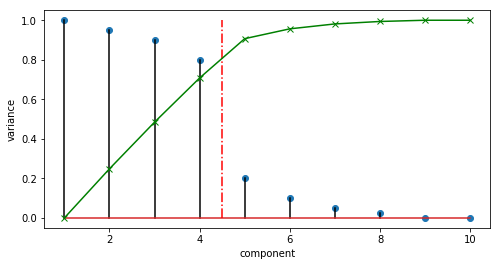

In [10]:
lambdas = [1, 0.95, 0.9, 0.8, 0.2, 0.1, 0.05, 0.025, 0.0, 0.0]
cdf = [np.sum(lambdas[:d]) for d in np.arange(len(lambdas))]
ii = np.arange(len(lambdas))+1
plt.stem(ii, lambdas, "k-")
plt.plot([4.5, 4.5], [0,1], "r-.")
plt.plot(ii, cdf/max(cdf), "gx-")
plt.xlabel("component"); plt.ylabel("variance");

* Eigenvalue analysis provides important information about the intrinsic data dimensionality
* intrinsic dimensionality can of course be much lower!

**Remarks**:
* Eigenvalue analysis is purely variance-driven 
* no statement is made about the semantic content in the dimension
* non-linear structures are 'by principle' not findable using PCA
* Few large eigenvalues can maybe only contain useless noise...
* Practical procedure requires particular tricks if very-high-dimensional data are given 
 * e.g. images where $d$ may be up to $10^6$.